# 1. Lire Shanghai.geojson
On utilise geopandas

In [3]:
import geopandas as gpd
gpd.read_file('Shanghai.geojson')

,id,height,geometry
0,0,6.0,"POLYGON ((121.5000945270062 30.83609613580277,..."
1,1,6.0,"POLYGON ((121.4272683793306 31.02042648728832,..."
2,2,6.0,"POLYGON ((121.4159862577915 31.14166777970753,..."
3,3,6.0,"POLYGON ((121.4193631595373 31.14298253985129,..."
4,4,6.0,"POLYGON ((121.4154815113544 31.14310841576376,..."
5,5,6.0,"POLYGON ((121.4194432199001 31.148507545696, 1..."
6,6,6.0,"POLYGON ((121.4209789013863 31.14876573873196,..."
7,7,6.0,"POLYGON ((121.4272848671675 31.20184455505646,..."
8,8,6.0,"POLYGON ((121.4029918885231 31.22646535019791,..."
9,9,6.0,"POLYGON ((121.4025140392781 31.23103210144235,..."


# 2. Calculer les centroïdes des polygones
On utilise la fonction centroid de geopandas.

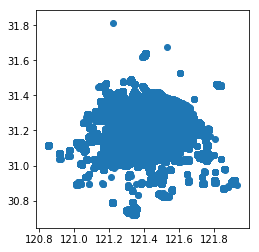

In [4]:
from matplotlib import pyplot as plt
shanghai = gpd.read_file('Shanghai.geojson') 

shanghai['centroid']=shanghai.centroid
shanghai.head()
shanghai = shanghai.set_geometry('centroid')
shanghai.plot()

# 3. Mettre les centroïdes dans une matrice
On veut mettre les centroïdes dans un array

In [5]:
import numpy as np
import shapely.geometry
sh_array = np.array(shanghai['centroid'])
print(sh_array)

 <shapely.geometry.point.Point object at 0x11ca959e8> ...


# 4. Calculer les distances entre tous les centroïdes
On veut calculer la distance du point 1 aux points 2, ..., n.

In [9]:
from scipy.spatial import distance
#comment faire varier les indices ? Avec des boucles for ? NUL
#dist = np.linalg.norm(sh_array-sh_array)
#eucl_sh = distance.euclidean(sh_array[1], sh_array[1])
#eucl_sh = distance.pdist(sh_array, sh_array, 'euclidean')
eucl_dist = []
for i in range(len(sh_array)):
    for j in range(i, len(sh_array)):
        eucl_dist.append(np.linalg.norm(sh_array[i]-sh_array[j]))

KeyboardInterrupt: 